<img src="./figures/logo_SU.png" style="height:100px">

# Méthodes approchées pour la poutre encastrée

On souhaite déterminer les pulsations propres et les modes propres de vibrations longitudinales d'une poutre encastrée par la méthode de Rayleigh-Ritz. 

Pour cela, on définit les fonctions propres associées aux deux premiers modes de vibration d'une poutre encastrée-libre :

\begin{equation}
\begin{cases}
g_0(x) = \sin(\frac{\pi x}{2L}) \\
g_1(x) = \sin(\frac{3 \pi x }{2L})
\end{cases}
\end{equation}


Dans un premier temps, on considère le cas où l'autre extrémité est solidaire d'un matériau élastique de raideur $k$. La poutre subit les vibrations harmoniques de ses supports, ce qui engendre l'apparition d'ondes de traction-compression.

En utilisant comme fonctions propres de déplacement $g_0(x)$ et $g_1(x)$, déterminer les deux premières pulsations propres et les modes correspondants. On étudiera le cas particulier où $k = ES/L$.

<img src="./figures/Poutre_L1.png" style="height:150px">

La méthodologie à employer est celle présentée en cours :
    
* Calculer l'énergie potentielle
* Calculer l'énergie cinétique
* Construire les matrices masse et raideur
* Calculer les pulsations propres
* Calculer les modes propres

In [3]:
from sympy import * 
# as we import all from it, every variable we're using (e.g. sin()) 
# are comming from sympy such that wa have sym.sin()

# do not do # from numpy import * after that, otherwise one would get sin() == np.sin()

from sympy.interactive.printing import init_printing

init_printing(use_unicode=False, wrap_line=False, no_global=True)

import sympy as sym
import numpy as np

from numpy import linalg as LA
%matplotlib inline
import pylab as plt

# ----------------------------------------------------------------------

# symbols to be used
x, E, S, k, S, m, CL, S0, Iz, CT = sym.symbols('x E S k S m CL S0 Iz CT')

L     = sym.symbols('L',positive=True)

phi   = sym.Symbol('phi')
phi1  = sym.Symbol('phi_1')
phi2  = sym.Symbol('phi_2')
phi3  = sym.Symbol('phi_3')

vphi  = sym.Symbol('\dot{\phi}')
vphi1 = sym.Symbol('\dot{\phi_1}')
vphi2 = sym.Symbol('\dot{\phi_2}')
vphi3 = sym.Symbol('\dot{\phi_3}')

rho   = sym.Symbol('rho')
omg   = sym.Symbol('omega')
beta  = sym.Symbol('beta')

On définit le déplacement par l'expression :
\begin{equation*}
	u(x,t) \simeq \sin\left(\dfrac{\pi}{2L}x\right) \phi_1(t) + \sin\left(\dfrac{3\pi}{2L}x\right) \phi_2(t),
\end{equation*}

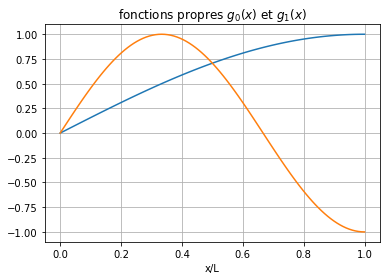

In [5]:
# Visualisation des fonctions de forme

LL = 1 
xx = np.linspace(0, LL, 100)

g0 = np.sin(np.pi * xx / (2*LL))
g1 = np.sin(3 * np.pi * xx / (2*LL))

plt.figure()
plt.plot(xx, g0)
plt.plot(xx, g1)

plt.title("fonctions propres $g_0(x)$ et $g_1(x)$")
plt.xlabel("x/L")

plt.grid('True')

In [7]:
def u(x):
    return sin(pi*x/2/L)*phi1 + sin(3*pi*x/2/L)*phi2

### Calcul de l'énergie potenitelle $U$ 

L'énergie de déformation $U$ est la somme de l'énergie de déformation de la poutre $U_{poutre}$ et de l'énergie de déformation du ressort $U_{ressort}$. 


#### L'énergie de déformation de la poutre

$\quad U_{poutre}= \displaystyle\dfrac{1}{2} \int_0^L ES \left(\dfrac{\partial u}{\partial x}\right)^2 dx \quad$ a pour expression :

In [11]:
Upoutre = sym.simplify(Rational(1,2)*integrate(E*S*(diff(u(x), x))**2, (x, 0, L))); # we integrate over x between 0 & L

print('Upoutre =')
Upoutre 

Upoutre =


#### L'énergie de déformation du ressort 

$\quad U_{ressort}=\dfrac{1}{2} k \left[ u(B,t) - u(L,t) \right]^2 \quad$ ($B$ le point lié à l'encastrement à droite) $\quad$ a pour expression :

In [12]:
def Uressort(k):
    return sym.simplify(Rational(1,2)*k*(0-u(L))**2);

print('Uressort =') 
Uressort(k)

Uressort=


L'énergie de déformation $U$ pour $k = ES/L$ a donc pour expression : 

In [15]:
U = Upoutre + Uressort(E*S/L);

print("U =");
U

U =


### Calcul de l'énergie cinétique $T$

Ici le ressort est considéré de masse négligeable. L'énergie cinétique du système est égale à l'énergie cinétique de la poutre et a pour expression

 $\quad T_{poutre}= \displaystyle\dfrac{1}{2} \int_0^L \rho S \left(\dfrac{\partial u}{\partial t}\right)^2 dx \quad$ a pour expression :

In [17]:
def vt(x):
    return sin(pi*x/2/L)*vphi1 + sin(3*pi*x/2/L)*vphi2

Tpoutre = sym.simplify(Rational(1,2)*integrate(rho*S*(vt(x))**2,(x,0,L)));

print("Tpoutre =");
Tpoutre

Tpoutre =


### Construction des matrices masse et raideur

Comme $U=\dfrac{1}{2} \underline{\phi}^{T} \underline{\underline{K}} \underline{\phi}$ on en déduit la matrice de raideur $K$ :

In [18]:
K = sym.Matrix([[diff(U, phi1, phi1), diff(U, phi1, phi2)], [diff(U, phi2, phi1), diff(U, phi2, phi2)]])

print("Matrice raideur K :");
K

Matrice raideur K :


[    /      2\                 ]
[    |    pi |                 ]
[E*S*|1 + ---|                 ]
[    \     8 /       -E*S      ]
[-------------       -----     ]
[      L               L       ]
[                              ]
[                   /        2\]
[                   |    9*pi |]
[               E*S*|1 + -----|]
[    -E*S           \      8  /]
[    -----      ---------------]
[      L               L       ]

Comme $T=\dfrac{1}{2} \dot{\underline{\phi}}^{T} M \dot{\underline{\phi}}$ on en déduit la matrice de masse $M$ :

In [19]:
M = sym.Matrix([[diff(Tpoutre, vphi1, vphi1), diff(Tpoutre, vphi1, vphi2)], [diff(Tpoutre, vphi2, vphi1), diff(Tpoutre, vphi2, vphi2)]])

print("Matrice masse M :");
M

Matrice masse M :


[L*S*rho         ]
[-------     0   ]
[   2            ]
[                ]
[         L*S*rho]
[   0     -------]
[            2   ]

### Les pulsations propres sont les solutions de $det(K-\omega^2 M)=0$ :

In [21]:
A = K - omg**2 * M

print('On calcule le déterminant de la matrice suivante :')
A

On calcule le déterminant de la matrice suivante :


[    /      2\                                                   ]
[    |    pi |                                                   ]
[E*S*|1 + ---|            2                                      ]
[    \     8 /   L*S*omega *rho               -E*S               ]
[------------- - --------------               -----              ]
[      L               2                        L                ]
[                                                                ]
[                                    /        2\                 ]
[                                    |    9*pi |                 ]
[                                E*S*|1 + -----|            2    ]
[            -E*S                    \      8  /   L*S*omega *rho]
[            -----               --------------- - --------------]
[              L                        L                2       ]

On peut simplifier cette matrice en introduisant le paramètre $\beta = \dfrac{L}{C_L} \omega$ avec $C_L=\sqrt{\dfrac{E}{\rho}}$ la vitesse des ondes longitudinales 

In [22]:
Amodif = simplify((K - (E*beta**2)/(rho*L**2)*M)*L/(E*S)) #omg**2 = (E*beta**2)/(rho*L**2)=> omega=beta*CL/L
Amodif

[      2         2                     ]
[  beta        pi                      ]
[- ----- + 1 + ---          -1         ]
[    2          8                      ]
[                                      ]
[                         2           2]
[                     beta        9*pi ]
[       -1          - ----- + 1 + -----]
[                       2           8  ]

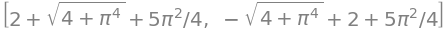

In [24]:
detAmodif = Amodif.det()

beta2=sym.solve(detAmodif, beta**2)
beta2

In [25]:
print('omega_1 =',sqrt(beta2[0]).evalf()*CL/L)
print(' ')
print('omega_2 =',sqrt(beta2[1]).evalf()*CL/L) 

omega_1 = 4.94036573486685*CL/L
 
omega_2 = 2.06562276528821*CL/L


In [26]:
vec_propres = Amodif.eigenvects();
print('X1 = ')
X1=sym.simplify((vec_propres[0][2][0]).subs(beta,sqrt(beta2[0])).evalf())
pprint(X1)
print(' ')
print('X2 = ')
X2=sym.simplify((vec_propres[1][2][0]).subs(beta,sqrt(beta2[1])).evalf())
pprint(X2)

# Verification modes propres
#pprint(Amodif.subs(beta,sqrt(beta2[0])).evalf()*X1)
#pprint(Amodif.subs(beta,sqrt(beta2[1])).evalf()*X2)

X1 = 
⎡-0.100301845897719⎤
⎢                  ⎥
⎣       1.0        ⎦
 
X2 = 
⎡9.96990624698708⎤
⎢                ⎥
⎣      1.0       ⎦


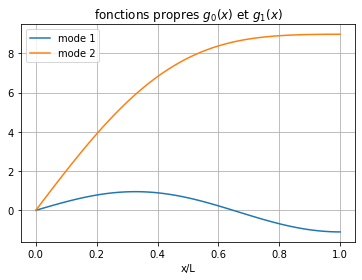

In [28]:
plt.figure()

plt.plot(xx, X1[0]*g0 + X1[1]*g1, label='mode 1')
plt.plot(xx, X2[0]*g0 + X2[1]*g1, label='mode 2')

plt.title("fonctions propres $g_0(x)$ et $g_1(x)$")
plt.xlabel("x/L")

plt.legend()
plt.grid('True')

### II.

#### On suppose maintenant que l'extrémité libre supporte une charge de masse $m$. La poutre subissant la même excitation, en utilisant les mêmes fonctions de déplacement, déterminer les deux premières pulsations propres et les modes correspondants. On étudiera le cas particulier où $m = \rho SL/10$

<img src="./figures/Poutre_L2.png" style="height:150px">

La méthodologie à employerla même que précédemment :
    
* Calculer l'énergie potentielle
* Calculer l'énergie cinétique
* Construire les matrices masse et raideur
* Calculer les pulsations propres
* Calculer les modes propres

### Calcul de l'énergie de déformation $U$ et de l'énergie cinétique $T$

L'énergie cinétique $T$ est la somme de l'énergie cinétique de la poutre $T_{poutre}$ (déjà calculée au I.) et de l'énergie cinétique de la masse $m$ masse $T_{masse}$.

#### énérgie cinétique de la poutre

$\quad T_{poutre}= \displaystyle\dfrac{1}{2} \int_0^L \rho S \left(\dfrac{\partial u}{\partial t}\right)^2 dx \quad$ a pour expression :

In [68]:
Tpoutre = sym.simplify(Rational(1,2)*integrate(rho*S*(vt(x))**2, (x, 0, L)));

print('Tpoutre =')
Tpoutre

Tpoutre =


#### énérgie cinétique de la masse

In [69]:
def Tmasse(m):
    Tmasse = sym.simplify(Rational(1,2)*m*(vt(L))**2);
    return Tmasse

print('T_masse =')
Tmasse(m)

T_masse =


#### énergie cintétique totale

In [72]:
T = sym.simplify(Tpoutre + Tmasse(rho*S*L/10))

print("T=");
T

T=


#### Energie potentielle

$\quad U_{poutre}= \displaystyle\dfrac{1}{2} \int_0^L ES \left(\dfrac{\partial u}{\partial x}\right)^2 dx \quad$ a pour expression :

In [73]:
Upoutre = sym.simplify(Rational(1, 2)*integrate(E*S*(diff(u(x), x))**2, (x, 0, L))); # we integrate over x between 0 & L

print('Upoutre =')
Upoutre

Upoutre =


In [76]:
def Umasse(x):
    Umasse = sym.simplify(Rational(1, 2)*integrate(E*S*(diff(u(x), x))**2, (x, 0, L))); # we integrate over x between 0 & L
    return Umasse
    
print('Umasse =')
Umasse(1/2)

Umasse =


ValueError: 
Can't calculate derivative wrt 0.500000000000000.

L'énergie de déformation $U$ pour $k = ES/L$ a donc pour expression : 

In [57]:
U = Upoutre + Umasse(L);

print("U =");
U

U =


### Construction des matrices masse et raideur

In [58]:
# Construction de la matrice de masse M
M = sym.Matrix([[diff(T,vphi1,vphi1),diff(T,vphi1,vphi2)], [diff(T,vphi2,vphi1),diff(T,vphi2,vphi2)]])
print("Matrice masse :");
M

Matrice masse :


[3*L*S*rho  -L*S*rho ]
[---------  ---------]
[    5          10   ]
[                    ]
[-L*S*rho   3*L*S*rho]
[---------  ---------]
[    10         5    ]

In [59]:
# Construction de la matrice de raideur K
U=Upoutre
K = sym.Matrix([[diff(U,phi1,phi1),diff(U,phi1,phi2)], [diff(U,phi2,phi1),diff(U,phi2,phi2)]])
print("Matrice raideur :");
#sym.pprint(K)
K

Matrice raideur :


[  2               ]
[pi *E*S           ]
[-------      0    ]
[  8*L             ]
[                  ]
[             2    ]
[         9*pi *E*S]
[   0     ---------]
[            8*L   ]

### Les pulsations propres sont les solutions de $det(K-\omega^2 M)=0$ :

In [60]:
A = K - omg**2 * M
print(u'On calcule le déterminant de la matrice suivante :')
A

On calcule le déterminant de la matrice suivante :


[  2                  2                      2           ]
[pi *E*S   3*L*S*omega *rho         L*S*omega *rho       ]
[------- - ----------------         --------------       ]
[  8*L            5                       10             ]
[                                                        ]
[               2                2                  2    ]
[      L*S*omega *rho        9*pi *E*S   3*L*S*omega *rho]
[      --------------        --------- - ----------------]
[            10                 8*L             5        ]

In [61]:
Amodif = simplify((K - (E*beta**2)/(rho*L**2)*M)*L/(E*S)) #omg**2 = (E*beta**2)/(rho*L**2)=> omega=beta*CL/L
Amodif

[        2     2            2      ]
[  3*beta    pi         beta       ]
[- ------- + ---        -----      ]
[     5       8           10       ]
[                                  ]
[         2               2       2]
[     beta          3*beta    9*pi ]
[     -----       - ------- + -----]
[       10             5        8  ]

In [64]:
detAmodif = Amodif.det()

beta2 = sym.solve(detAmodif, beta**2)
beta2

In [65]:
#Recherche des pulsations propres
print('omega_1 =', sqrt(beta2[0]).evalf()*CL/L)
print(' ')
print('omega_2 =', sqrt(beta2[1]).evalf()*CL/L) 

omega_1 = 1.43146089671042*CL/L
 
omega_2 = 4.37036291276109*CL/L


### Les modes propres 

In [66]:
# Recherche des modes propres associés

vec_propres = Amodif.eigenvects();

print('X1 = ')
X1=sym.simplify((vec_propres[0][2][0]).subs(beta,sqrt(beta2[0])).evalf())
pprint(X1)

print(' ')

print('X2 = ')
X2=sym.simplify((vec_propres[1][2][0]).subs(beta,sqrt(beta2[1])).evalf())
pprint(X2)

# Verification modes propres
#pprint(Amodif.subs(beta,sqrt(beta2[0])).evalf()*X1)
#pprint(Amodif.subs(beta,sqrt(beta2[1])).evalf()*X2)

X1 = 
⎡-48.1867732448956⎤
⎢                 ⎥
⎣       1.0       ⎦
 
X2 = 
⎡0.186773244895649⎤
⎢                 ⎥
⎣       1.0       ⎦


### visualisation

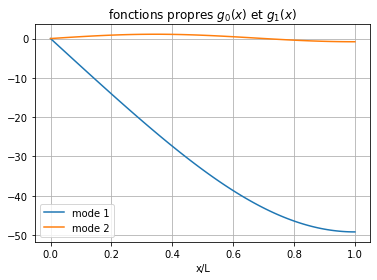

In [67]:
plt.figure()

plt.plot(xx, X1[0]*g0 + X1[1]*g1, label='mode 1')
plt.plot(xx, X2[0]*g0 + X2[1]*g1, label='mode 2')

plt.title("fonctions propres $g_0(x)$ et $g_1(x)$")
plt.xlabel("x/L")

plt.legend()
plt.grid('True')